In [1]:
import geopandas as gpd
import descartes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline

In [2]:

Peninsular_shape = gpd.read_file("Peninsular.shp")
type(Peninsular_shape)
Peninsular_shape

,fid,ST_NM,geometry
0,1.0,Andhra Pradesh,"MULTIPOLYGON (((81.39375 16.33380, 81.32692 16..."
1,5.0,Gujarat,"MULTIPOLYGON (((72.67653 21.15570, 72.70319 21..."
2,6.0,Karnataka,"MULTIPOLYGON (((74.30911 15.79856, 74.29779 15..."
3,7.0,Kerala,"POLYGON ((76.43138 11.66633, 76.44222 11.64056..."
4,8.0,Maharashtra,"POLYGON ((80.66342 21.33138, 80.67964 21.31193..."
5,10.0,Tamil Nadu,"MULTIPOLYGON (((78.93930 9.18738, 78.93603 9.1..."
6,11.0,Odisha,"MULTIPOLYGON (((86.38937 19.96351, 86.38051 19..."


Text(0.5, 1.0, 'Indian Peninsular Region')

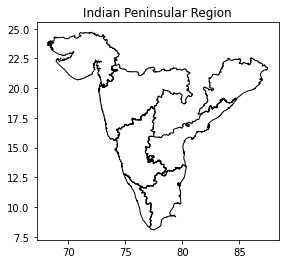

In [3]:
Peninsular_shape.plot(edgecolor='black', facecolor='none')
plt.title('Indian Peninsular Region')

<AxesSubplot:>

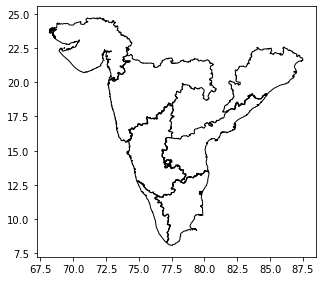

In [4]:
fig,ax = plt.subplots(figsize = (5,5))
Peninsular_shape.plot(ax = ax, edgecolor='black', facecolor='none')

In [5]:
df4 = pd.read_csv("hydro_signtauresIndianPeninsula1Predicted.csv")
crs = {'init':'espg:4326'}
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df4

,GaugeID,Mean Annual Flow (m3/s),Mean Annual Monsoon Flow (m3/s),Low Flow (m3/s),High Flow (m3/s),Slope of FDC,Annual HF Frequency (Days),Annual LF Frequency (Days),Latitude,Longitude,Predicted Values_MMF,Predicted Values_HF,Predicted_SlopeofFDC,PAnnual LF Frequency (Days),Predicted Values_MAF
0,IWM-gauge-0100,8.089800,11.945100,1.1220,133.2700,1.827450,12.000000,26.500000,11.1309,76.6861,43.564561,87.9900,2.681117,33.110050,37.996477
1,IWM-gauge-0248,2.219200,1.656000,0.1700,20.0700,5.978000,11.000000,55.000000,11.3217,76.8928,38.420011,42.7100,4.485170,45.598219,37.474923
2,IWM-gauge-0387,274.760000,677.006000,13.5500,1372.3735,5.678000,115.000000,134.333000,21.7678,87.1642,751.366740,2058.1249,5.442924,103.459378,441.399883
3,IWM-gauge-0636,510.265851,544.160319,38.3355,1650.0000,3.204780,0.777778,13.138889,16.0500,74.3500,392.344561,1113.8110,3.626481,24.570085,354.406416
4,IWM-gauge-0763,171.590008,206.518865,1.5325,579.7650,3.678942,2.085106,28.437500,14.9400,75.6200,187.590417,793.8120,4.064095,46.199806,156.504895
5,IWM-gauge-0877,99.621960,138.724445,1.5385,319.5185,4.600424,1.080000,32.769231,13.2900,79.4800,159.454193,540.8991,4.968694,37.543377,85.970848
6,IWM-gauge-0880,285.111041,303.776635,22.9800,949.2500,3.070795,1.593750,16.688889,16.5000,74.4700,293.313335,871.1530,3.499887,28.915320,303.867448
7,IWM-gauge-0908,179.946829,215.481796,6.0000,803.7700,5.693498,13.045455,45.250000,16.1900,74.7900,222.518693,832.8660,5.072269,42.253218,200.143990
8,IWM-gauge-1061,884.470131,1231.582982,70.9775,3099.5000,3.923497,3.000000,43.200000,20.8800,86.0100,1079.062404,2003.6590,4.350561,47.352695,698.040503
9,IWM-gauge-1089,1155.533471,1254.719695,49.2800,4086.4800,3.245973,1.911765,23.046512,16.6800,74.6000,1254.719695,4086.4800,3.478312,25.626695,1155.533471


In [6]:
gdf1 = gpd.GeoDataFrame(df4,geometry=gpd.points_from_xy(df4['Longitude'],df4['Latitude']),crs =4326)
gdf1

,GaugeID,Mean Annual Flow (m3/s),Mean Annual Monsoon Flow (m3/s),Low Flow (m3/s),High Flow (m3/s),Slope of FDC,Annual HF Frequency (Days),Annual LF Frequency (Days),Latitude,Longitude,Predicted Values_MMF,Predicted Values_HF,Predicted_SlopeofFDC,PAnnual LF Frequency (Days),Predicted Values_MAF,geometry
0,IWM-gauge-0100,8.089800,11.945100,1.1220,133.2700,1.827450,12.000000,26.500000,11.1309,76.6861,43.564561,87.9900,2.681117,33.110050,37.996477,POINT (76.68610 11.13090)
1,IWM-gauge-0248,2.219200,1.656000,0.1700,20.0700,5.978000,11.000000,55.000000,11.3217,76.8928,38.420011,42.7100,4.485170,45.598219,37.474923,POINT (76.89280 11.32170)
2,IWM-gauge-0387,274.760000,677.006000,13.5500,1372.3735,5.678000,115.000000,134.333000,21.7678,87.1642,751.366740,2058.1249,5.442924,103.459378,441.399883,POINT (87.16420 21.76780)
3,IWM-gauge-0636,510.265851,544.160319,38.3355,1650.0000,3.204780,0.777778,13.138889,16.0500,74.3500,392.344561,1113.8110,3.626481,24.570085,354.406416,POINT (74.35000 16.05000)
4,IWM-gauge-0763,171.590008,206.518865,1.5325,579.7650,3.678942,2.085106,28.437500,14.9400,75.6200,187.590417,793.8120,4.064095,46.199806,156.504895,POINT (75.62000 14.94000)
5,IWM-gauge-0877,99.621960,138.724445,1.5385,319.5185,4.600424,1.080000,32.769231,13.2900,79.4800,159.454193,540.8991,4.968694,37.543377,85.970848,POINT (79.48000 13.29000)
6,IWM-gauge-0880,285.111041,303.776635,22.9800,949.2500,3.070795,1.593750,16.688889,16.5000,74.4700,293.313335,871.1530,3.499887,28.915320,303.867448,POINT (74.47000 16.50000)
7,IWM-gauge-0908,179.946829,215.481796,6.0000,803.7700,5.693498,13.045455,45.250000,16.1900,74.7900,222.518693,832.8660,5.072269,42.253218,200.143990,POINT (74.79000 16.19000)
8,IWM-gauge-1061,884.470131,1231.582982,70.9775,3099.5000,3.923497,3.000000,43.200000,20.8800,86.0100,1079.062404,2003.6590,4.350561,47.352695,698.040503,POINT (86.01000 20.88000)
9,IWM-gauge-1089,1155.533471,1254.719695,49.2800,4086.4800,3.245973,1.911765,23.046512,16.6800,74.6000,1254.719695,4086.4800,3.478312,25.626695,1155.533471,POINT (74.60000 16.68000)


Text(45.27141484776591, 0.5, 'Observations')

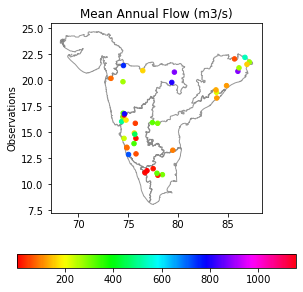

In [7]:
fig,ax = plt.subplots(figsize=(5,5))
Peninsular_shape.plot(ax=ax, alpha = 50, color = "white", edgecolor='grey', facecolor='none')
chara = gdf1.plot(ax=ax,column ="Mean Annual Flow (m3/s)", cmap = "hsv", markersize = 20, legend= True,legend_kwds={'orientation':"horizontal"}, figsize=(5,5))
plt.title("Mean Annual Flow (m3/s)")
plt.ylabel("Observations")

Text(45.27141484776591, 0.5, 'Observations')

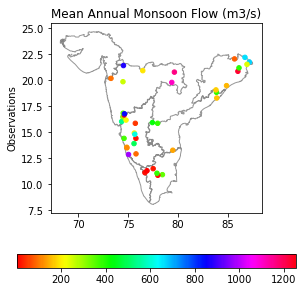

In [8]:
fig,ax = plt.subplots(figsize=(5,5))
Peninsular_shape.plot(ax=ax, alpha = 50, color = "white", edgecolor='grey', facecolor='none')
chara = gdf1.plot(ax=ax,column ="Mean Annual Monsoon Flow (m3/s)", cmap = "hsv", markersize = 20, legend= True,legend_kwds={'orientation':"horizontal"}, figsize=(5,5))
plt.title("Mean Annual Monsoon Flow (m3/s)")
plt.ylabel("Observations")

Text(45.27141484776591, 0.5, 'Observations')

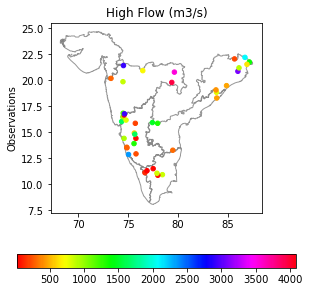

In [9]:
fig,ax = plt.subplots(figsize=(5,5))
Peninsular_shape.plot(ax=ax, alpha = 50, color = "white", edgecolor='grey', facecolor='none')
chara = gdf1.plot(ax=ax,column ="High Flow (m3/s)", cmap = "hsv", markersize = 20, legend= True,legend_kwds={'orientation':"horizontal"}, figsize=(5,5))
plt.title("High Flow (m3/s)")
plt.ylabel("Observations")

Text(45.27141484776591, 0.5, 'Observations')

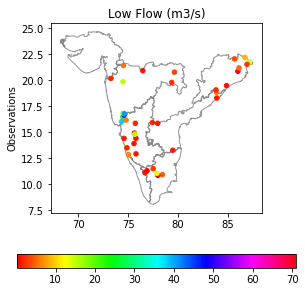

In [10]:
fig,ax = plt.subplots(figsize=(5,5))
Peninsular_shape.plot(ax=ax, alpha = 50, color = "white", edgecolor='grey', facecolor='none')
chara = gdf1.plot(ax=ax,column ="Low Flow (m3/s)", cmap = "hsv", markersize = 20, legend= True,legend_kwds={'orientation':"horizontal"}, figsize=(5,5))
plt.title("Low Flow (m3/s)")
plt.ylabel("Observations")

Text(45.27141484776591, 0.5, 'Observations')

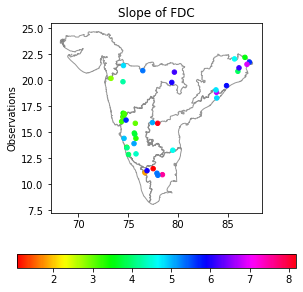

In [11]:
fig,ax = plt.subplots(figsize=(5,5))
Peninsular_shape.plot(ax=ax, alpha = 50, color = "white", edgecolor='grey', facecolor='none')
chara = gdf1.plot(ax=ax,column ="Slope of FDC", cmap = "hsv", markersize = 20, legend= True,legend_kwds={'orientation':"horizontal"}, figsize=(5,5))
plt.title("Slope of FDC")
plt.ylabel("Observations")

Text(45.27141484776591, 0.5, 'Observations')

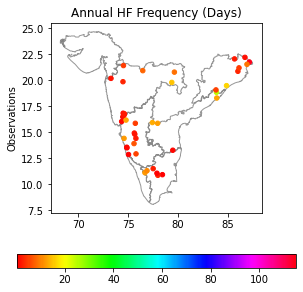

In [12]:
fig,ax = plt.subplots(figsize=(5,5))
Peninsular_shape.plot(ax=ax, alpha = 50, color = "white", edgecolor='grey', facecolor='none')
chara = gdf1.plot(ax=ax,column ="Annual HF Frequency (Days)", cmap = "hsv", markersize = 20, legend= True,legend_kwds={'orientation':"horizontal"}, figsize=(5,5))
plt.title("Annual HF Frequency (Days)")
plt.ylabel("Observations")

Text(45.27141484776591, 0.5, 'Observations')

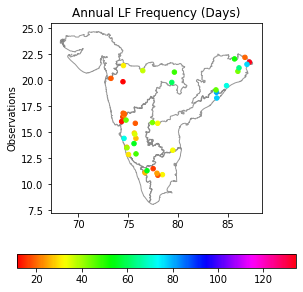

In [13]:
fig,ax = plt.subplots(figsize=(5,5))
Peninsular_shape.plot(ax=ax, alpha = 50, color = "white", edgecolor='grey', facecolor='none')
chara = gdf1.plot(ax=ax,column ="Annual LF Frequency (Days)", cmap = "hsv", markersize = 20, legend= True,legend_kwds={'orientation':"horizontal"}, figsize=(5,5))
plt.title("Annual LF Frequency (Days)")
plt.ylabel("Observations")